## Assignment 3

The following notebook is an extraction of the data within a CSV (email domains) file and its subsequent presentation in a pie chart
>
**Author**: Loic Bagnoud

Following along from the lecture, we will keep most of the same structure. We start by importing the packages we need.

In [1]:
# This imports pandas. 
import pandas as pd

I had some issues with the format and how it was showing. If I used __*print(df.head(5))*__ it displays a plain text version which is not very useful.
>
As such, it's better if we just use __*df.head(5)*__.

In [2]:
# We create a variable called url and put the csv link in there.
url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

# Afterwards, we read the variable with the read_csv function from pandas and display it
df = pd.read_csv(url)
df.head(5)

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


We now have our table and the data, so now we need to get the domains. For this, we do the following:

In [3]:
# We create a column at the end of the data frame called "email domain". This is where we'll store our domains.
df.insert(9, "Email Domain", True )

# We then split the strings present in the email column at the "@" sign and store them in the "email domain" column
df["Email Domain"] = df['Email'].str.split('@').str[1]
df.head(5)

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Email Domain
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer,example.org
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer,example.net
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy,example.org
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist,example.com
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer,example.net


With our domains organised, we can go ahead and start working on our pie chart.

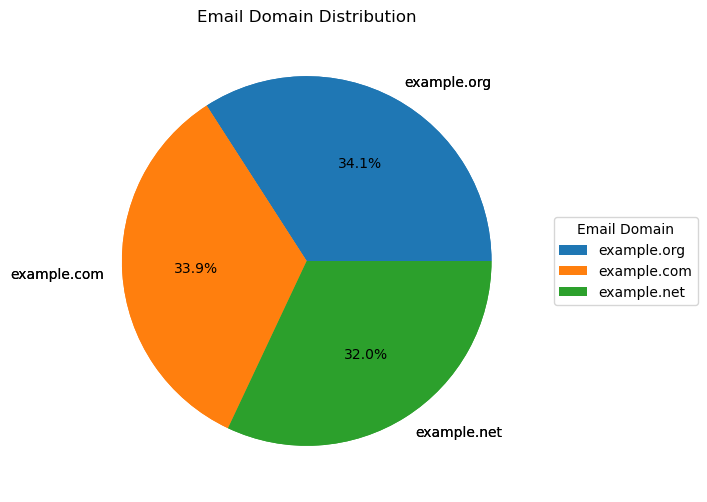

In [4]:
# We first go ahead and count the number of unique domains in the "email domain column." 
# .value_counts() is great for this, since it counts the frequency of unique values in a Series.
counts = df["Email Domain"].value_counts()
counts.name = None 

# For the actual pie plot, we go ahead and use the .plot.pie function from pandas and just define what we want. 
# In this case, as per the documentation, the y will be the column, we use the autopct to get the percentages, define measurements and
# add a title. 
counts.plot.pie(
    y="Email Domain",
    autopct="%1.1f%%",
    figsize=(6, 6),
    title="Email Domain Distribution",
    ylabel=""
)

# Then, after some issues with the legend that kept popping up in the middle of the pie chart, I had to go to the documentation of 
# matplotlib to see what I could use. I found .legend which allows me to customise the legend and put it on the right side. 
Legend = counts.plot.pie()

# By following, the documentation, we can set our parameters. 
Legend.legend(
    # This is the index and the names of the domains being counted
    counts.index,         
    # Followed by title, location for precision.       
    title="Email Domain",
    loc="center left",
    # And this just forces it to go to the right side and not stay in the middle of the pie chart.
    bbox_to_anchor=(1.02, 0.5),
)

References:
>
https://www.geeksforgeeks.org/python/python-pandas-series-value_counts/ - How to count values in a panda dataframe
>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
https://pandas.pythonhumanities.com/04_01_pandas_and_plots.html             - How to make plots with pandas dataframes, without matplotlib
>
https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct - Finding out about autopct to get percentages.
>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html - How to work with legends
>
__ChatGPT__ - On understanding why I kept having Counts on the left side of the pie chart.
>
_"This is working, but I have on the left side of the pie chart, count written there. How can I remove it?"_
>
_GPT - You’re seeing “count” because Pandas uses the Series name as the y-label on pie plots. You made a second pie (Legend = counts.plot.pie()) without ylabel="", so it shows up._
>
_Two clean fixes:_
>
_Best: plot once and add legend to the same axes_
>
_Or: clear the Series name before plotting_ (_Went with this one_)

In [5]:

# counts = df["Email Domain"].value_counts()
# counts.name = None            # <- remove the Series name so nothing is shown

# ax = counts.plot.pie(
#    autopct="%1.1f%%",
#    figsize=(6, 6),
#    title="Email Domain Distribution",
#    ylabel=""                 # safe to keep
#)

# ax.legend(counts.index, title="Email Domain", loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)
# ax.figure.tight_layout()


## END